# Kuragayala Kenny Joel ML LAB 5

In [88]:
#Importiung the Libraries 
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Read the data from file
data = pd.read_excel("F:/SEM 6/ML LAB/GHIData.xlsx")

In [90]:
# Preview the data
data.head()

,Country,2000–2002,2006–2008,2013–2015,2019–2021,1998–2002,2005–2009,2012–2016,2017–2021,1998–2002.1,2005–2009.1,2012–2016.1,2017–2021.1,Early,Mid,2014,2020
0,Afghanistan,47.8,29.8,20.7,29.8,10.9,8.3,9.5,5.1,50.6,51.1,40.4,38.2,12.9,10.0,7.4,5.8
1,Albania,4.9,8.3,5.0,3.9,12.2,8.5,4.5,1.6,39.2,25.0,15.2,11.3,2.7,1.7,1.0,1.0
2,Algeria,8.0,5.9,2.9,2.5,3.1,4.1,4.1,2.7,23.6,15.4,11.7,9.8,4.0,3.1,2.5,2.3
3,Angola,67.5,46.1,13.7,20.8,11.2,8.2,4.9,6.1,46.7,29.2,37.6,29.8,20.4,14.7,9.3,7.1
4,Argentina,3.0,3.3,2.5,3.7,1.7,1.2,1.6,2.7,10.5,8.2,8.3,12.3,2.0,1.6,1.2,0.9


In [91]:
# Descriptive statistics
mean_2000= data['Early'].mean()
median_2000 = data['Early'].median()
var_2000 = data['Early'].var()
std_2000 = data['Early'].std()

In [92]:
mean_ = data['Mid'].mean()
median_ = data['Mid'].median()
var_ = data['Mid'].var()
std_ = data['Mid'].std()

In [93]:
print(f"Early: mean={mean_2000}, median={median_2000}, variance={var_2000}, std={std_2000}")

Early: mean=7.323529411764706, median=5.1, variance=33.79840522875818, std=5.813639585385232


In [94]:
print(f"Mid: mean={mean_}, median={median_}, variance={var_}, std={std_}")

Mid: mean=5.457352941176468, median=3.6500000000000004, variance=20.039204793028315, std=4.476517038170224


In [95]:
# Extract the two columns of interest
early_col = data['Early']
mid_col = data['Mid']

Calculates the covariance matrix between the early_col and mid_col columns of the data.

In [96]:
# Calculate the conditional probability
cov = np.cov(early_col, mid_col)
cond_prob = cov[0, 1] / cov[1, 1]
print("Conditional probability:", cond_prob)

Conditional probability: 1.257345106188903


Calculates the posterior probability for each value of the mid_col using the conditional probability, means, and standard deviations of the early_col and mid_col.

In [97]:
# Calculate the posterior probability for each value of the "Mid" column
mid_mean = np.mean(mid_col)
mid_std = np.std(mid_col)
early_mean = np.mean(early_col)
early_std = np.std(early_col)
post_prob = (cond_prob * (mid_col - mid_mean) / mid_std * early_std) + early_mean
print("Posterior probability:\n", post_prob)

Posterior probability:
 0      14.741265
1       1.188109
2       3.474183
3      22.415944
4       1.024818
         ...    
131     1.188109
132     2.331146
133     9.189370
134    13.598228
135    14.088101
Name: Mid, Length: 136, dtype: float64


In [98]:
# Extract the column of interest
col = data['Early']

Calculates the probability mass function (PMF) for the col using the numpy.histogram function with automatic binning and normalized density.
Normalizes the PMF so that its sum is equal to one.

In [99]:
# Calculate the PMF
pmf, bin_edges = np.histogram(col, bins='auto', density=True)
pmf = pmf / np.sum(pmf)

In [100]:
# Calculate the CDF
cdf = np.cumsum(pmf)

In [101]:
# Calculate the PDF
pdf = stats.gaussian_kde(col)

Creates a range of 1000 equally spaced values between the minimum and maximum values of col.

In [102]:
# Generate a range of values for the PDF
pdf_range = np.linspace(min(col), max(col), 1000)
# Evaluate the PDF at the range of values
pdf_values = pdf.evaluate(pdf_range)

In [103]:
# Print the results
print("PMF:\n", pmf)
print("CDF:\n", cdf)

PMF:
 [0.35294118 0.16911765 0.08823529 0.10294118 0.08088235 0.05882353
 0.07352941 0.05147059 0.02205882]
CDF:
 [0.35294118 0.52205882 0.61029412 0.71323529 0.79411765 0.85294118
 0.92647059 0.97794118 1.        ]


In [104]:
print("PDF Values:\n", pdf_values)

PDF Values:
 [0.0648352  0.06524174 0.06564584 0.06604743 0.06644645 0.06684282
 0.06723648 0.06762736 0.06801539 0.06840051 0.06878266 0.06916175
 0.06953773 0.06991054 0.07028011 0.07064638 0.07100928 0.07136875
 0.07172474 0.07207717 0.07242599 0.07277114 0.07311256 0.07345019
 0.07378398 0.07411386 0.07443979 0.0747617  0.07507955 0.07539328
 0.07570284 0.07600817 0.07630923 0.07660596 0.07689833 0.07718627
 0.07746975 0.07774871 0.07802312 0.07829293 0.07855809 0.07881857
 0.07907432 0.07932531 0.0795715  0.07981284 0.08004931 0.08028087
 0.08050749 0.08072913 0.08094576 0.08115735 0.08136387 0.0815653
 0.08176161 0.08195277 0.08213876 0.08231955 0.08249513 0.08266548
 0.08283056 0.08299038 0.0831449  0.08329412 0.08343802 0.08357659
 0.08370982 0.08383769 0.0839602  0.08407735 0.08418911 0.08429549
 0.08439649 0.08449211 0.08458233 0.08466717 0.08474661 0.08482068
 0.08488937 0.08495268 0.08501062 0.08506321 0.08511044 0.08515233
 0.0851889  0.08522015 0.0852461  0.08526676 0.085

In [105]:
# Define the probability distribution parameters
mu_early = np.mean(early_col)
mu_mid = np.mean(mid_col)
sigma_early = np.std(early_col)
sigma_mid = np.std(mid_col)

Creates an array of 1000 evenly spaced values between 0 and 20. This will be used as the x-axis values for the probability density and mass functions.

In [106]:
# Create a range of x values
x = np.linspace(0, 20, 1000)

Calculates the probability density function for a Gaussian (normal) distribution with mean mu_early and standard deviation sigma_early. This is done using the pdf() function from the stats.norm module in SciPy. The resulting array of probabilities is assigned to pdf_gaussian_early.

In [107]:
# Calculate the probability density function (PDF) for a Gaussian distribution
pdf_gaussian_early = stats.norm.pdf(x, loc=mu_early, scale=sigma_early)
pdf_gaussian_mid = stats.norm.pdf(x, loc=mu_mid, scale=sigma_mid)

n = len(early): Sets n equal to the length of the "Early" column of data. This will be used as the number of trials for the binomial and Bernoulli distributions.


p = 0.5: Sets p equal to 0.5, which will be used as the probability of success for the binomial and Bernoulli distributions.


Calculates the probability mass function for a binomial distribution with n trials and probability of success p. This is done using the pmf() function from the stats.binom module in SciPy. The resulting array of probabilities is assigned to pmf_binomial_early.

In [108]:
# Calculate the probability mass function (PMF) for a binomial distribution
n = len(early)
p = 0.5
pmf_binomial_early = stats.binom.pmf(np.arange(n+1), n, p)
pmf_binomial_mid = stats.binom.pmf(np.arange(n+1), n, p)

But now here for bernouli

In [109]:
# Calculate the probability mass function (PMF) for a Bernoulli distribution
pmf_bernoulli_early = stats.bernoulli.pmf(np.arange(2), p)
pmf_bernoulli_mid = stats.bernoulli.pmf(np.arange(2), p)

Plotting the graph

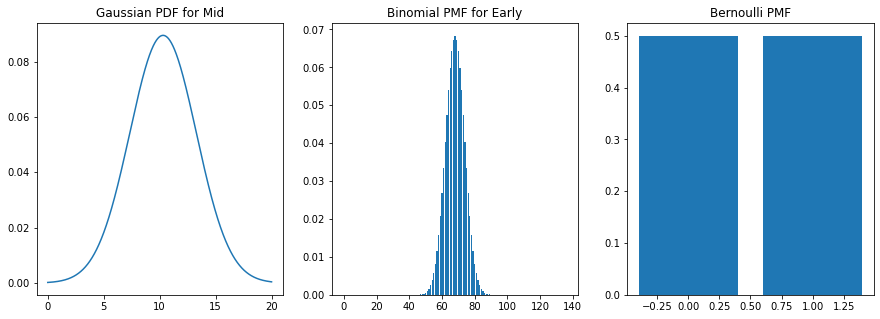

In [110]:
# Plot the PDF and PMFs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, pdf_mid)
ax[0].set_title("Gaussian PDF for Mid")

ax[1].bar(np.arange(n+1), pmf_binomial)
ax[1].set_title("Binomial PMF for Early")

ax[2].bar(np.arange(2), pmf_bernoulli)
ax[2].set_title("Bernoulli PMF")

plt.show()

**For Synthetic Data**

In [111]:
from sklearn.datasets import make_classification
# Generate synthetic data with two features and two classes
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=0.5, random_state=42)

In [112]:
# Create dataframe from X and y
data = pd.DataFrame(X, columns=['Early', 'Mid'])
data['Label'] = y

In [113]:
data.head()

,Early,Mid,Label
0,0.101034,1.035353,1
1,0.255945,-0.672352,0
2,0.854479,-0.448528,0
3,2.603090,0.733485,0
4,0.253178,0.287514,1


In [114]:
# Descriptive statistics
mean_2000= data['Early'].mean()
median_2000 = data['Early'].median()
var_2000 = data['Early'].var()
std_2000 = data['Early'].std()

In [115]:
mean_ = data['Mid'].mean()
median_ = data['Mid'].median()
var_ = data['Mid'].var()
std_ = data['Mid'].std()

In [116]:
print(f"Early: mean={mean_2000}, median={median_2000}, variance={var_2000}, std={std_2000}")

Early: mean=0.5258396245654144, median=0.523749934813558, variance=1.1480199562689142, std=1.0714569315977727


In [117]:
print(f"Mid: mean={mean_}, median={median_}, variance={var_}, std={std_}")

Mid: mean=-0.012693103895032632, median=-0.050302076144572216, variance=0.7848185395861093, std=0.8858998473789852


In [118]:
# Extract the two columns of interest
early_col = data['Early']
mid_col = data['Mid']

In [119]:
# Calculate the conditional probability
cov = np.cov(early_col, mid_col)
cond_prob = cov[0, 1] / cov[1, 1]
print("Conditional probability:", cond_prob)

Conditional probability: 0.03801866135247242


In [120]:
# Calculate the posterior probability for each value of the "Mid" column
mid_mean = np.mean(mid_col)
mid_std = np.std(mid_col)
early_mean = np.mean(early_col)
early_std = np.std(early_col)
post_prob = (cond_prob * (mid_col - mid_mean) / mid_std * early_std) + early_mean
print("Posterior probability:\n", post_prob)

Posterior probability:
 0      0.574031
1      0.495507
2      0.505799
3      0.560150
4      0.539644
         ...   
995    0.524200
996    0.512859
997    0.513148
998    0.577889
999    0.584219
Name: Mid, Length: 1000, dtype: float64


In [121]:
# Extract the column of interest
col = data['Early']

In [122]:
# Calculate the PMF
pmf, bin_edges = np.histogram(col, bins='auto', density=True)
pmf = pmf / np.sum(pmf)

In [123]:
# Calculate the CDF
cdf = np.cumsum(pmf)

In [124]:
# Calculate the PDF
pdf = stats.gaussian_kde(col)

In [125]:
# Generate a range of values for the PDF
pdf_range = np.linspace(min(col), max(col), 1000)
# Evaluate the PDF at the range of values
pdf_values = pdf.evaluate(pdf_range)

In [126]:
# Print the results
print("PMF:\n", pmf)
print("CDF:\n", cdf)


PMF:
 [0.003 0.001 0.003 0.009 0.011 0.018 0.029 0.038 0.051 0.077 0.089 0.094
 0.109 0.097 0.095 0.077 0.066 0.053 0.034 0.013 0.016 0.007 0.005 0.005]
CDF:
 [0.003 0.004 0.007 0.016 0.027 0.045 0.074 0.112 0.163 0.24  0.329 0.423
 0.532 0.629 0.724 0.801 0.867 0.92  0.954 0.967 0.983 0.99  0.995 1.   ]


In [127]:
print("PDF Values:\n", pdf_values)

PDF Values:
 [0.00484572 0.004909   0.00497124 0.00503238 0.00509241 0.0051513
 0.00520902 0.00526557 0.00532092 0.00537506 0.00542799 0.0054797
 0.00553019 0.00557948 0.00562755 0.00567444 0.00572016 0.00576473
 0.00580817 0.00585053 0.00589182 0.0059321  0.0059714  0.00600978
 0.00604729 0.00608399 0.00611994 0.0061552  0.00618985 0.00622397
 0.00625762 0.0062909  0.0063239  0.0063567  0.00638939 0.00642209
 0.00645489 0.00648789 0.00652121 0.00655495 0.00658923 0.00662417
 0.00665988 0.00669649 0.00673413 0.00677291 0.00681296 0.00685441
 0.0068974  0.00694204 0.00698848 0.00703684 0.00708725 0.00713985
 0.00719476 0.00725212 0.00731205 0.00737468 0.00744014 0.00750856
 0.00758005 0.00765474 0.00773274 0.00781418 0.00789916 0.00798779
 0.00808018 0.00817644 0.00827666 0.00838093 0.00848935 0.00860201
 0.00871898 0.00884034 0.00896617 0.00909653 0.00923149 0.0093711
 0.00951541 0.00966446 0.00981831 0.00997698 0.0101405  0.0103089
 0.01048219 0.01066038 0.01084347 0.01103148 0.011224

In [128]:
# Define the probability distribution parameters
mu_early = np.mean(early_col)
mu_mid = np.mean(mid_col)
sigma_early = np.std(early_col)
sigma_mid = np.std(mid_col)

In [129]:
# Create a range of x values
x = np.linspace(0, 20, 1000)

In [130]:
# Calculate the probability density function (PDF) for a Gaussian distribution
pdf_gaussian_early = stats.norm.pdf(x, loc=mu_early, scale=sigma_early)
pdf_gaussian_mid = stats.norm.pdf(x, loc=mu_mid, scale=sigma_mid)

In [131]:
# Calculate the probability mass function (PMF) for a binomial distribution
n = len(early)
p = 0.5
pmf_binomial_early = stats.binom.pmf(np.arange(n+1), n, p)
pmf_binomial_mid = stats.binom.pmf(np.arange(n+1), n, p)

In [132]:
# Calculate the probability mass function (PMF) for a Bernoulli distribution
pmf_bernoulli_early = stats.bernoulli.pmf(np.arange(2), p)
pmf_bernoulli_mid = stats.bernoulli.pmf(np.arange(2), p)

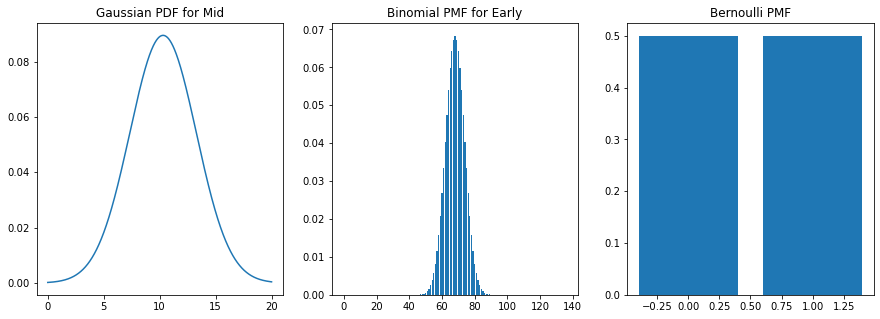

In [133]:
# Plot the PDF and PMFs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, pdf_mid)
ax[0].set_title("Gaussian PDF")

ax[1].bar(np.arange(n+1), pmf_binomial)
ax[1].set_title("Binomial PMF")

ax[2].bar(np.arange(2), pmf_bernoulli)
ax[2].set_title("Bernoulli PMF")

plt.show()